Import Packages

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [3]:
parent_dir = '../../data/ping_pong/'

NMSG = 10_000_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}5/ping_pong_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}5/ping_pong_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}5/ping_pong_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}5/ping_pong_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [4]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Wed Mar 26 11:11:19 2025 +0100) (508.64ms ela...,2.050,0.0257,0.541,2.79,0.52,37.56,50.75 C,Nominal
1,(Wed Mar 26 11:11:19 2025 +0100) (506.13ms ela...,7.280,0.0573,0.760,8.27,1.25,99.48,50.75 C,Nominal
2,(Wed Mar 26 11:11:20 2025 +0100) (506.28ms ela...,0.906,0.0223,0.494,1.48,0.29,21.63,50.34 C,Nominal
3,(Wed Mar 26 11:11:20 2025 +0100) (509.67ms ela...,0.263,0.0263,0.408,0.76,0.17,12.35,50.34 C,Nominal
4,(Wed Mar 26 11:11:21 2025 +0100) (508.48ms ela...,0.265,0.0254,0.402,0.76,0.18,12.59,49.90 C,Nominal


In [5]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(136, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Wed Mar 26 11:11:31 2025 +0100) (1008.07ms el...,34.9,0.0398,1.010,36.01,3.85,97.82,48.62 C,Nominal
1,(Wed Mar 26 11:11:32 2025 +0100) (1004.64ms el...,32.5,0.0208,0.496,33.33,3.75,97.42,53.33 C,Nominal
2,(Wed Mar 26 11:11:33 2025 +0100) (1004.77ms el...,32.4,0.0199,0.502,33.22,3.76,99.32,56.88 C,Nominal
3,(Wed Mar 26 11:11:34 2025 +0100) (1006.27ms el...,32.5,0.0257,0.501,33.35,3.77,99.59,62.09 C,Nominal
4,(Wed Mar 26 11:11:35 2025 +0100) (1004.90ms el...,33.1,0.0214,0.490,33.96,3.77,99.76,64.23 C,Nominal


In [6]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Wed Mar 26 11:18:08 2025 +0100) (510.53ms ela...,0.1770,0.0000,0.255,0.21,0.03,2.27,44.11 C,Nominal
1,(Wed Mar 26 11:18:09 2025 +0100) (509.31ms ela...,1.7300,0.0316,0.391,1.99,0.39,27.62,44.53 C,Nominal
2,(Wed Mar 26 11:18:09 2025 +0100) (507.98ms ela...,0.0662,0.0000,0.264,0.10,0.03,2.22,44.53 C,Nominal
3,(Wed Mar 26 11:18:10 2025 +0100) (507.86ms ela...,0.0757,0.0000,0.264,0.13,0.05,2.87,44.47 C,Nominal
4,(Wed Mar 26 11:18:10 2025 +0100) (508.48ms ela...,1.8900,0.0060,0.525,2.09,0.31,21.55,44.47 C,Nominal


In [7]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(72, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Wed Mar 26 11:18:20 2025 +0100) (1011.05ms el...,13.0,0.00429,0.325,13.53,1.12,98.89,46.47 C,Nominal
1,(Wed Mar 26 11:18:21 2025 +0100) (1005.54ms el...,12.5,0.00000,0.274,13.00,1.04,99.75,50.10 C,Nominal
2,(Wed Mar 26 11:18:22 2025 +0100) (1006.98ms el...,12.3,0.00000,0.256,12.76,1.00,99.67,52.93 C,Nominal
3,(Wed Mar 26 11:18:23 2025 +0100) (1006.86ms el...,14.8,0.00000,0.318,15.25,1.31,98.68,55.22 C,Nominal
4,(Wed Mar 26 11:18:24 2025 +0100) (1006.63ms el...,14.7,0.00000,0.370,15.20,1.31,99.36,57.31 C,Nominal


Clean the Data

In [8]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [9]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [10]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-26 11:11:19,2.050,0.0257,0.541,2.79,0.52,37.56,50.75,Nominal,508.64
1,2025-03-26 11:11:19,7.280,0.0573,0.760,8.27,1.25,99.48,50.75,Nominal,506.13
2,2025-03-26 11:11:20,0.906,0.0223,0.494,1.48,0.29,21.63,50.34,Nominal,506.28
3,2025-03-26 11:11:20,0.263,0.0263,0.408,0.76,0.17,12.35,50.34,Nominal,509.67
4,2025-03-26 11:11:21,0.265,0.0254,0.402,0.76,0.18,12.59,49.90,Nominal,508.48


In [11]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(136, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-26 11:11:31,34.9,0.0398,1.010,36.01,3.85,97.82,48.62,Nominal,1008.07
1,2025-03-26 11:11:32,32.5,0.0208,0.496,33.33,3.75,97.42,53.33,Nominal,1004.64
2,2025-03-26 11:11:33,32.4,0.0199,0.502,33.22,3.76,99.32,56.88,Nominal,1004.77
3,2025-03-26 11:11:34,32.5,0.0257,0.501,33.35,3.77,99.59,62.09,Nominal,1006.27
4,2025-03-26 11:11:35,33.1,0.0214,0.490,33.96,3.77,99.76,64.23,Nominal,1004.90


In [12]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-26 11:18:08,0.1770,0.0000,0.255,0.21,0.03,2.27,44.11,Nominal,510.53
1,2025-03-26 11:18:09,1.7300,0.0316,0.391,1.99,0.39,27.62,44.53,Nominal,509.31
2,2025-03-26 11:18:09,0.0662,0.0000,0.264,0.10,0.03,2.22,44.53,Nominal,507.98
3,2025-03-26 11:18:10,0.0757,0.0000,0.264,0.13,0.05,2.87,44.47,Nominal,507.86
4,2025-03-26 11:18:10,1.8900,0.0060,0.525,2.09,0.31,21.55,44.47,Nominal,508.48


In [13]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(72, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-26 11:18:20,13.0,0.00429,0.325,13.53,1.12,98.89,46.47,Nominal,1011.05
1,2025-03-26 11:18:21,12.5,0.00000,0.274,13.00,1.04,99.75,50.10,Nominal,1005.54
2,2025-03-26 11:18:22,12.3,0.00000,0.256,12.76,1.00,99.67,52.93,Nominal,1006.98
3,2025-03-26 11:18:23,14.8,0.00000,0.318,15.25,1.31,98.68,55.22,Nominal,1006.86
4,2025-03-26 11:18:24,14.7,0.00000,0.370,15.20,1.31,99.36,57.31,Nominal,1006.63


Visualize the Data

In [14]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    
    # idle_df["Elapsed Time (s)"] = (idle_df["Timestamp"] - idle_df["Timestamp"].iloc[0]).dt.total_seconds()
    # bench_df["Elapsed Time (s)"] = (bench_df["Timestamp"] - bench_df["Timestamp"].iloc[0]).dt.total_seconds()

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


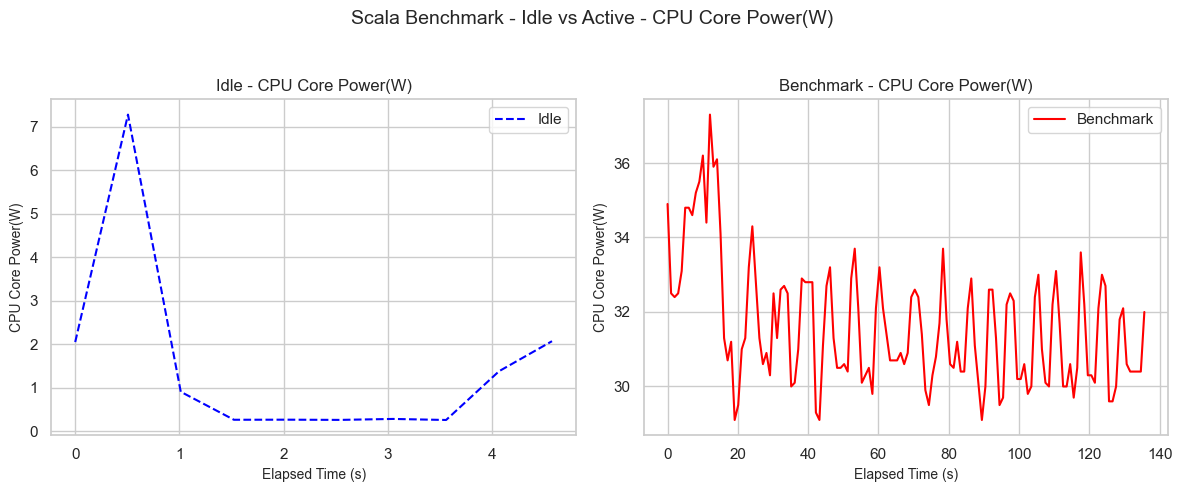

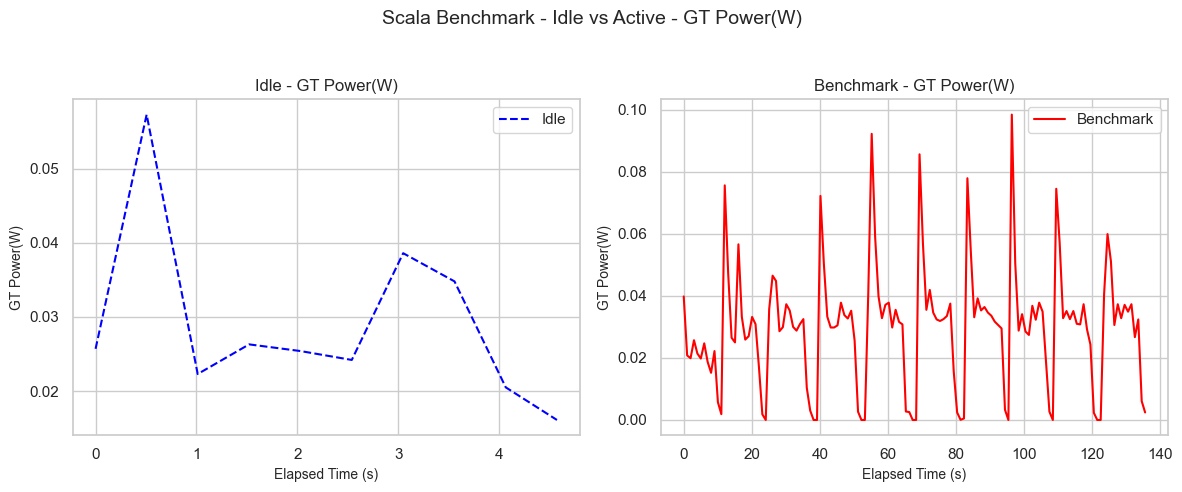

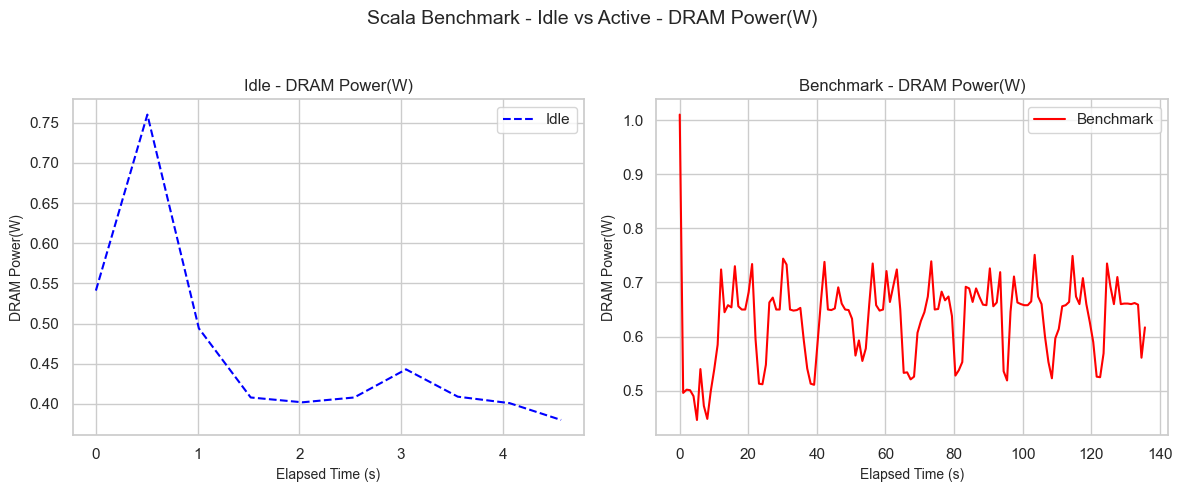

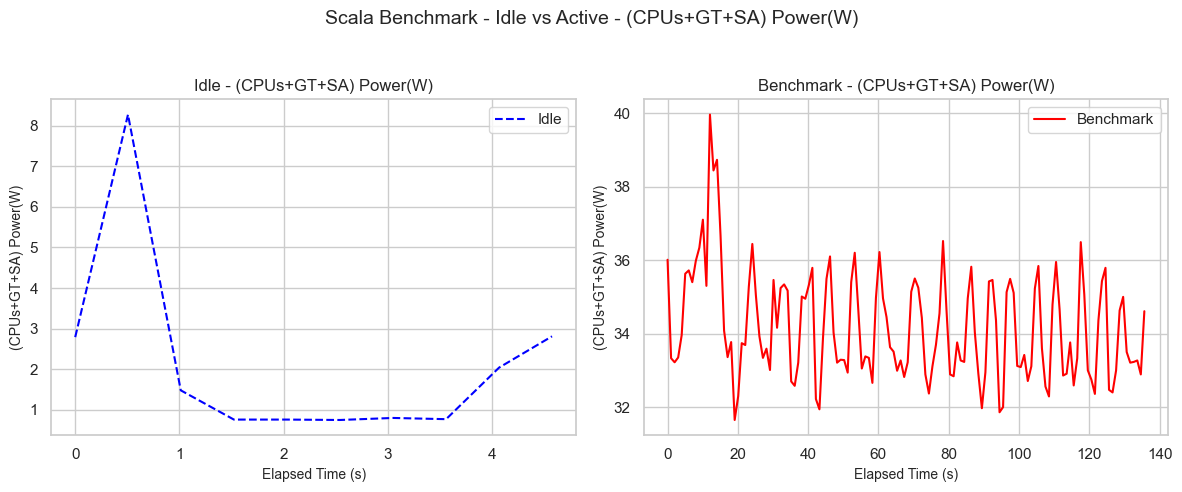

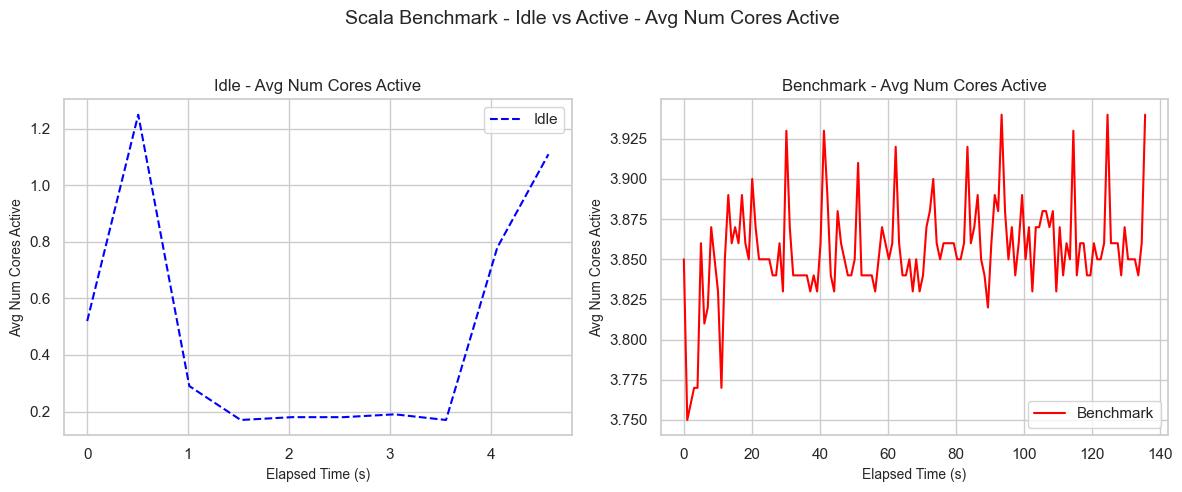

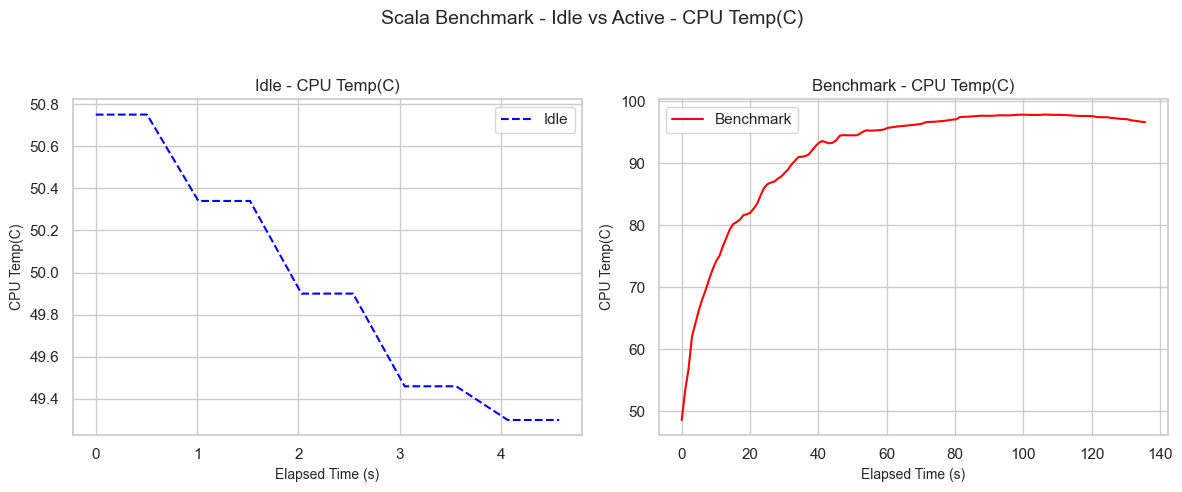

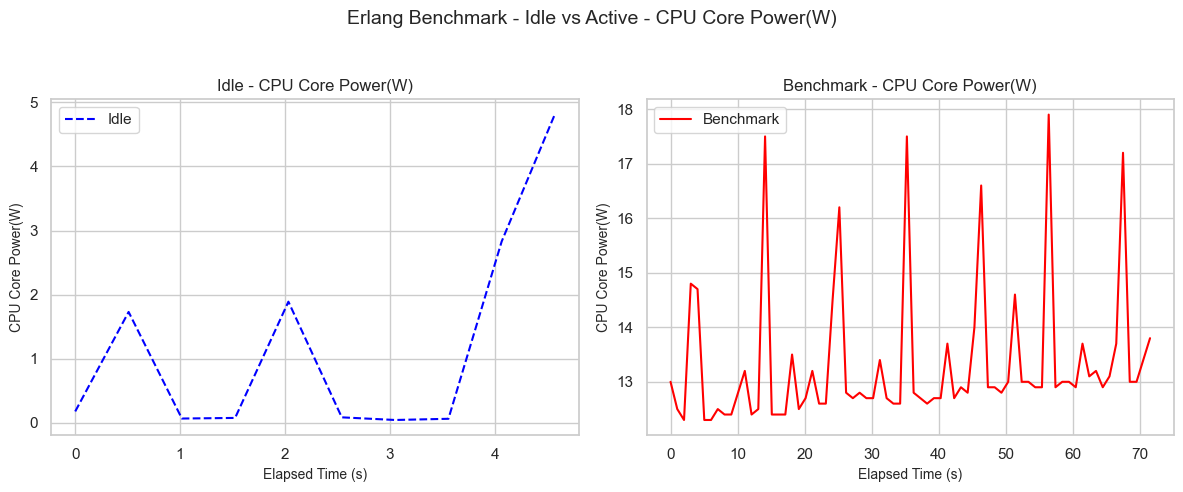

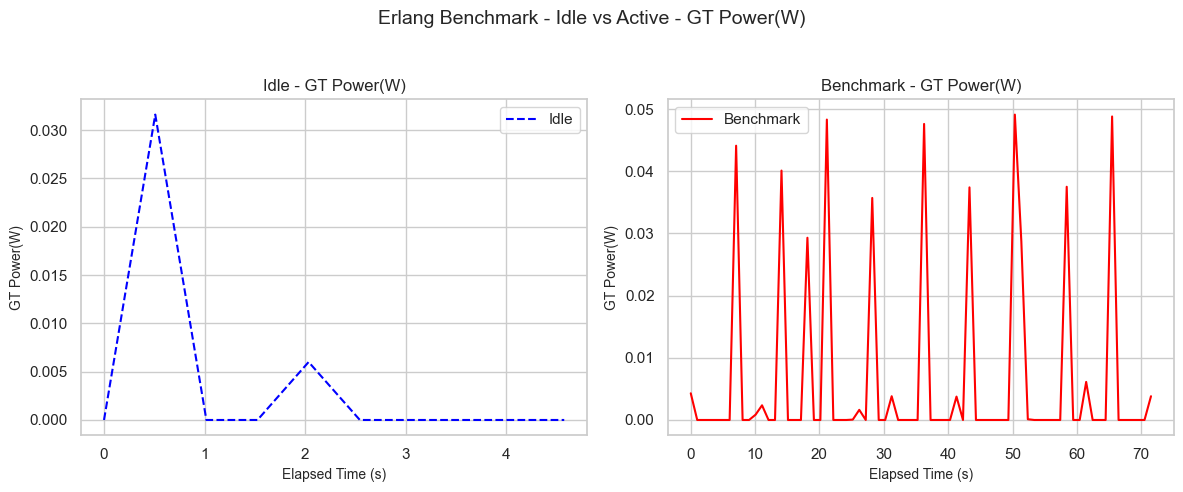

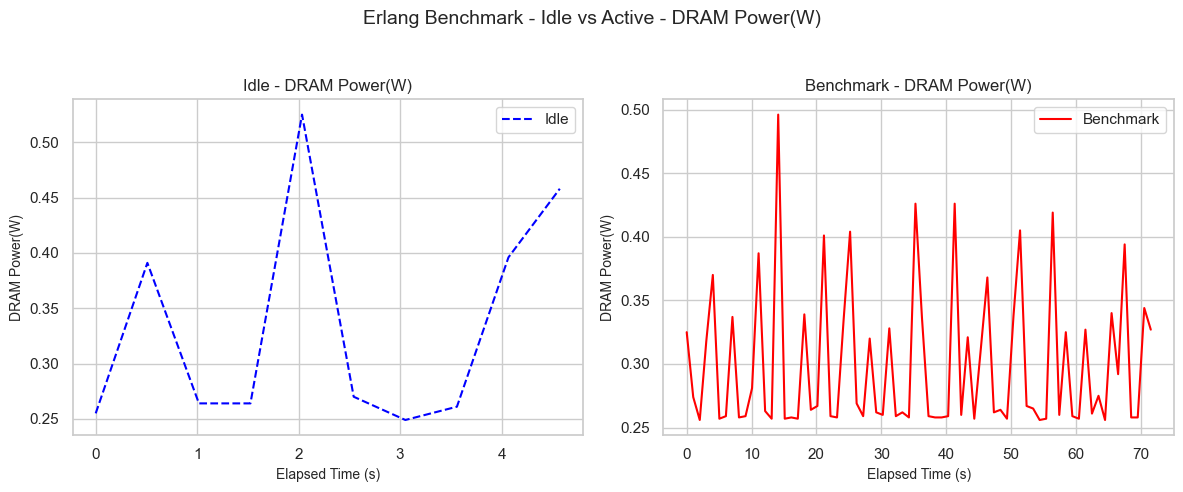

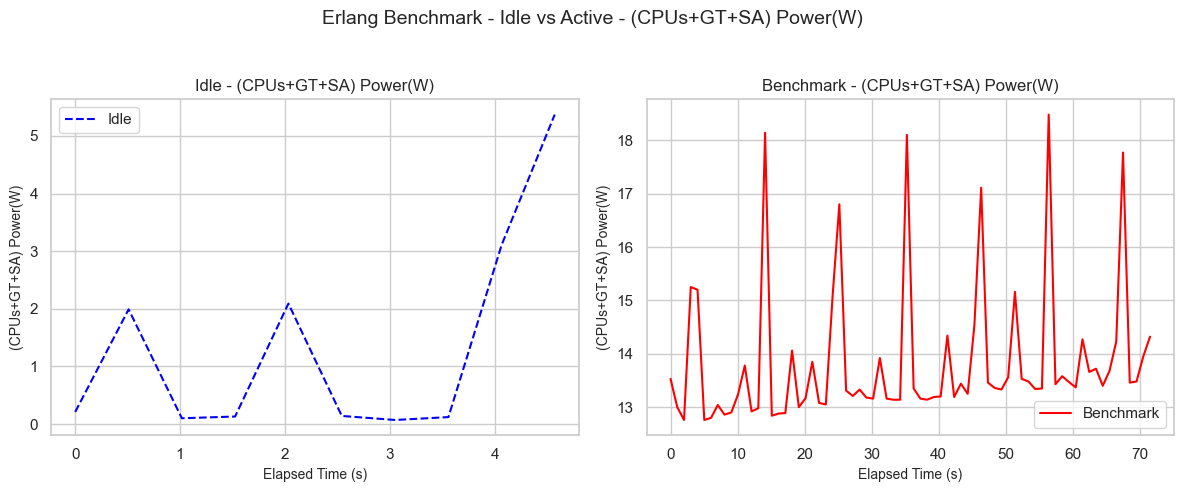

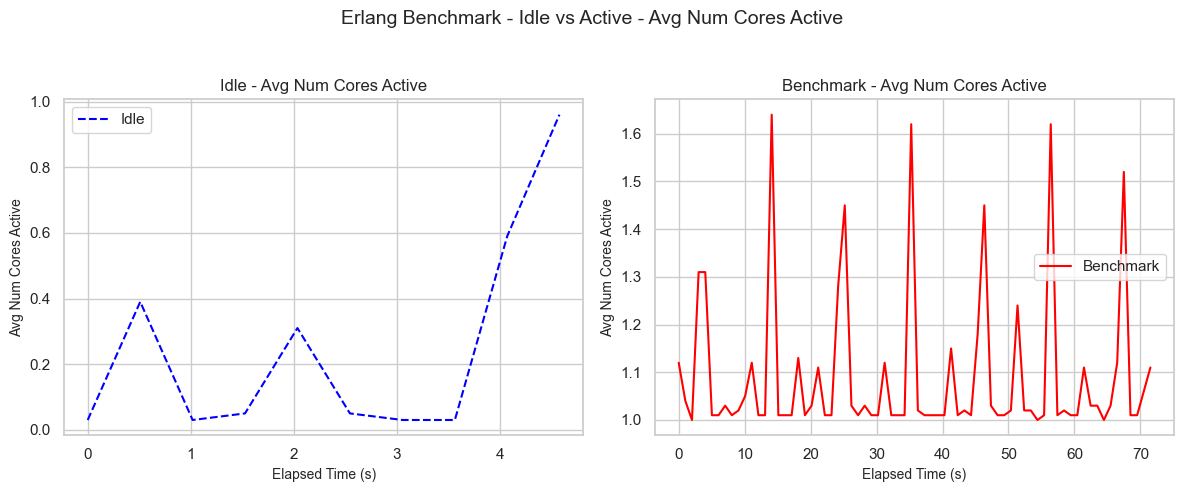

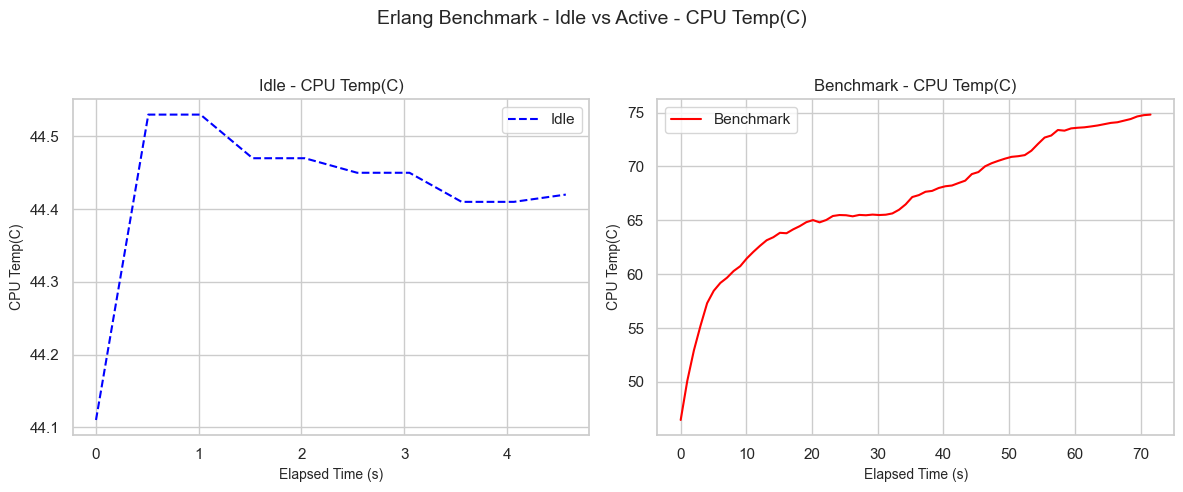

In [15]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [16]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [17]:
def format_message_count(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

message_label = format_message_count(NMSG)
title_config_prefix = f"({message_label} Messages, {ITERATIONS} Iterations)"

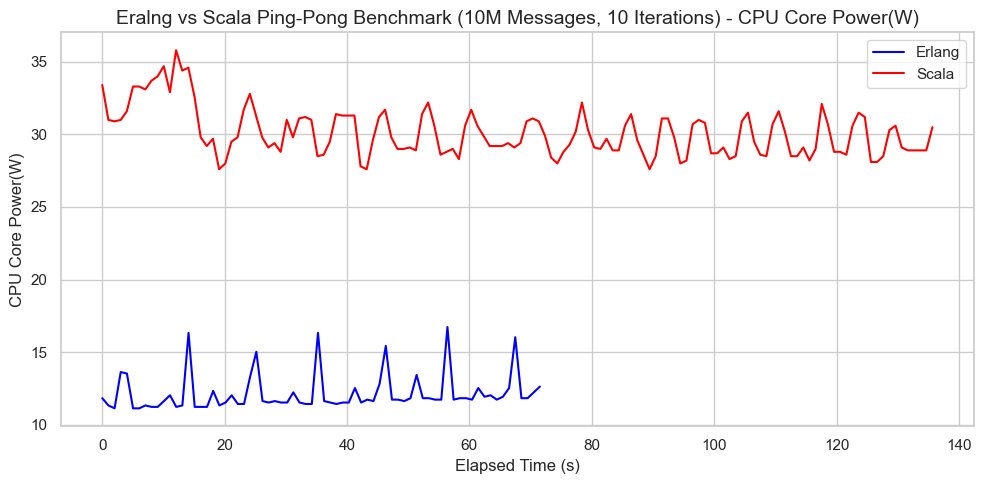

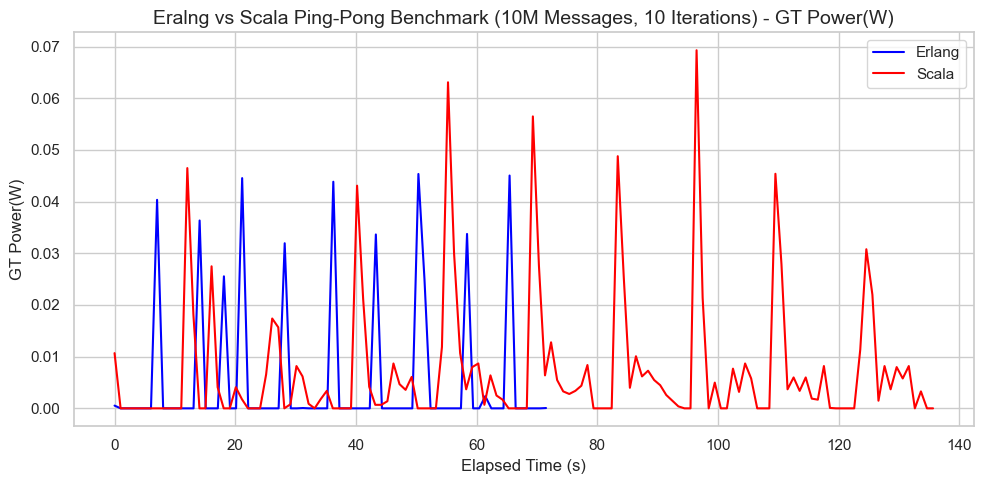

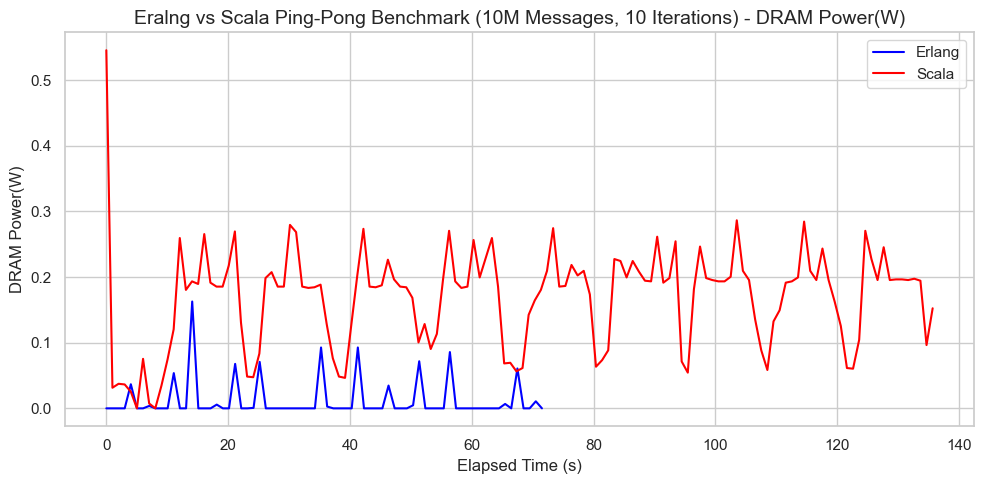

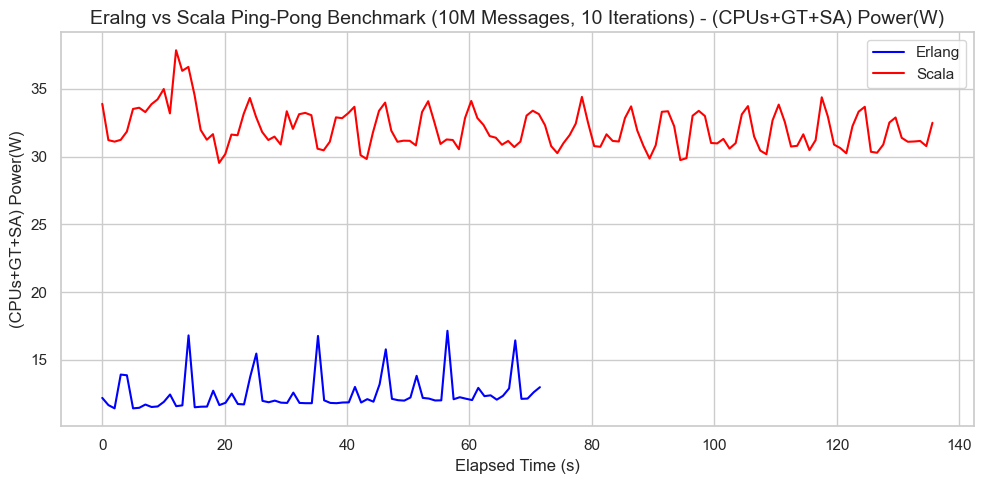

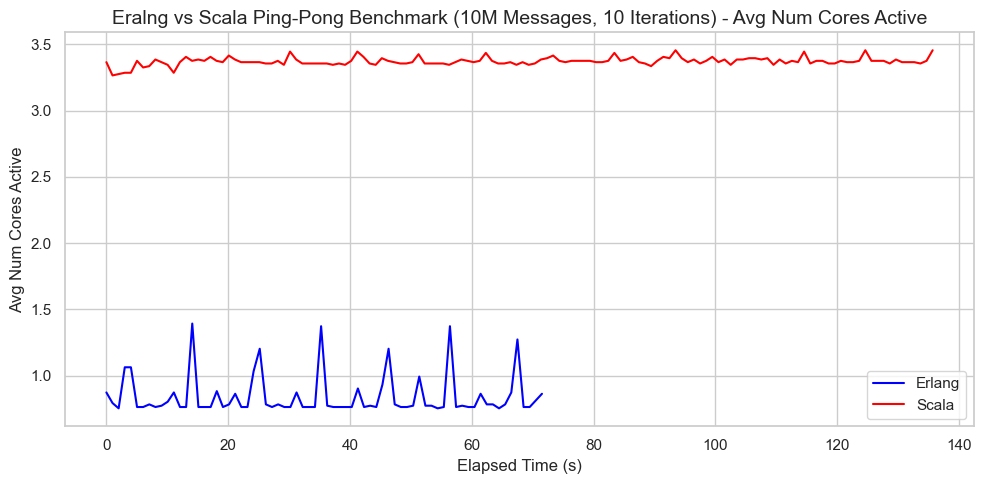

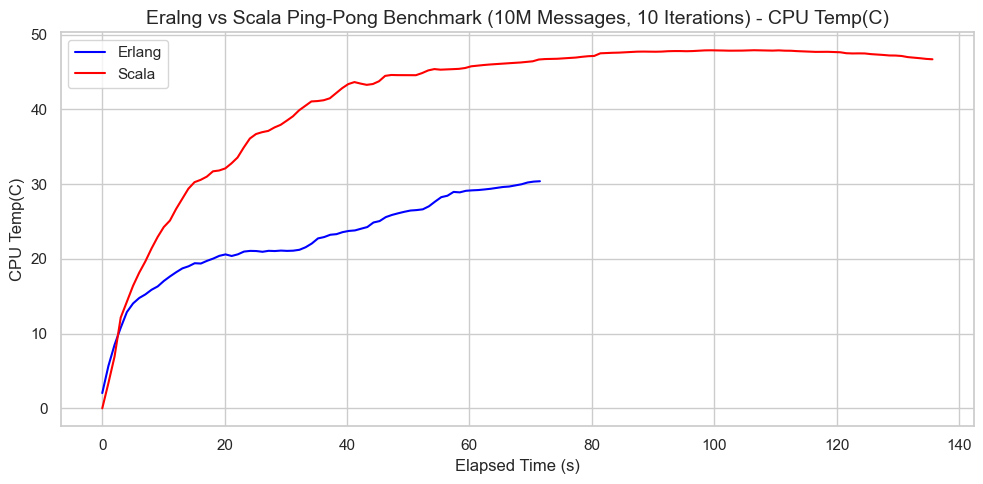

In [18]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Ping-Pong Benchmark {title_config_prefix}")


Compute Average Metrics

In [19]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [20]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        30.127276
GT Power(W)               0.000869
DRAM Power(W)             0.168076
(CPUs+GT+SA) Power(W)    32.062294
CPU Temp(C)              41.700294
Avg Num Cores Active      3.372103
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        12.143893
GT Power(W)               0.002815
DRAM Power(W)            -0.034203
(CPUs+GT+SA) Power(W)    12.503944
CPU Temp(C)              22.520000
Avg Num Cores Active      0.843972
dtype: float64


Compute Total Energy Consumption

In [21]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
# scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
# erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

scala_total_energy = (scala_net_avgs["CPU Core Power(W)"] + scala_net_avgs["DRAM Power(W)"]) * scala_total_time
erlang_total_energy = (erlang_net_avgs["CPU Core Power(W)"] + erlang_net_avgs["DRAM Power(W)"]) * erlang_total_time

# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Number of Messages": NMSG,
    "Iterations": ITERATIONS,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["Number of Messages"] == NMSG) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for Number of Messages =", NMSG, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../data/ping_pong/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 4140.59918602353 Joules
Erlang Benchmark: 878.3193678047056 Joules
